<a href="https://colab.research.google.com/github/ivanto-vrgs/Extraordinario-EDP-II/blob/main/extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

In [151]:
x = sp.symbols('x')
def f(x): 1-x**2

con valores en la frontera, u(0)=u(1)=0 y el paso de 0 a 1 se divide en 4, teniendo h=1/4

como sabemos, por Richardson xi=ih, con i=0,1,2,3,4, definimos los intervalos como:

In [152]:
n=4
h = sp.Rational(1, n)
intervalos = [i*h for i in range(n+1)]
intervalos

[0, 1/4, 1/2, 3/4, 1]

La matriz tridiagonal A es:

In [201]:
A = sp.zeros(3, 3)
for i in range(3):
  A[i, i] += 2/h**2
  if i > 0:
    A[i, i-1] += -1/h**2
  if i < 2:
      A[i, i+1] += -1/h**2

In [202]:
A

Matrix([
[ 32, -16,   0],
[-16,  32, -16],
[  0, -16,  32]])

La matriz b se encuentra evaluando la funcion en los nodos interiores, excluyendo 0 y 1.

In [209]:
b = sp.Matrix([1-((1/4)**2),1-((1/2)**2),1-((3/4)**2)])

In [210]:
b

Matrix([
[0.9375],
[  0.75],
[0.4375]])

los valores de U que faltan por encontrar son U1, U2 y U3

Hallamos la solucion de U con la siguiente funcion:

In [211]:
U=A.LUsolve(b)
U

Matrix([
[0.07421875],
[0.08984375],
[0.05859375]])

Con esto, llegamos a la solución exacta, estos valores son U1, U2 y U3

Hallamos la ecuacion original U(x)

In [283]:
x = sp.symbols('x')

u_derivada = sp.integrate(x**2 - 1, x)
u = sp.integrate(u_derivada, x)


a, b = sp.symbols('a b')
U_original = u + a*x + b

sol = sp.solve(
    [U_original.subs(x, 0), U_original.subs(x, 1)],
    (a, b)
    )

U_original = U_original.subs(sol)
U_original

x**4/12 - x**2/2 + 5*x/12

Evaluamos los valores .25, .5 y .75 en la funcion u_exact

In [284]:
for i in range(len(U)):
  print(f'U_original= {U_original.subs(x,intervalos[i+1]).evalf()}')


U_original= 0.0732421875000000
U_original= 0.0885416666666667
U_original= 0.0576171875000000


Así quedan los valores de U evaluados en los nodos.

In [285]:
u_h = [0, U[0], U[1], U[2], 0]
u_h

[0, 0.0742187500000000, 0.0898437500000000, 0.0585937500000000, 0]

Graficamos la solución exacta.

u(x) = x**4/12 - x**2/2 + 5*x/12


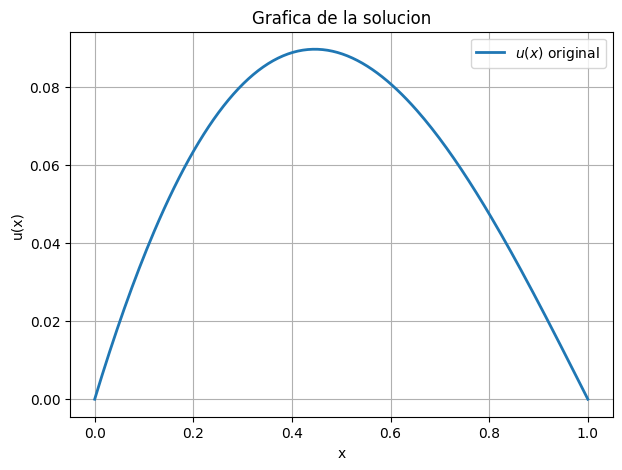

In [289]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


# Mostrar la función exacta
print("u(x) =", U_original)

# Convertir a función numérica
u_func = sp.lambdify(x, U_original, 'numpy')

# Dominio
x_vals = np.linspace(0, 1, 200)
u_vals = u_func(x_vals)

# Gráfica
plt.figure(figsize=(7,5))
plt.plot(x_vals, u_vals, label=r"$u(x)$ original", linewidth=2)
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Grafica de la solucion")
plt.grid(True)
plt.legend()
plt.show()